<a href="https://colab.research.google.com/github/Agneya-1BM22CS024/ML_Lab/blob/main/1BM22CS024_Lab_3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



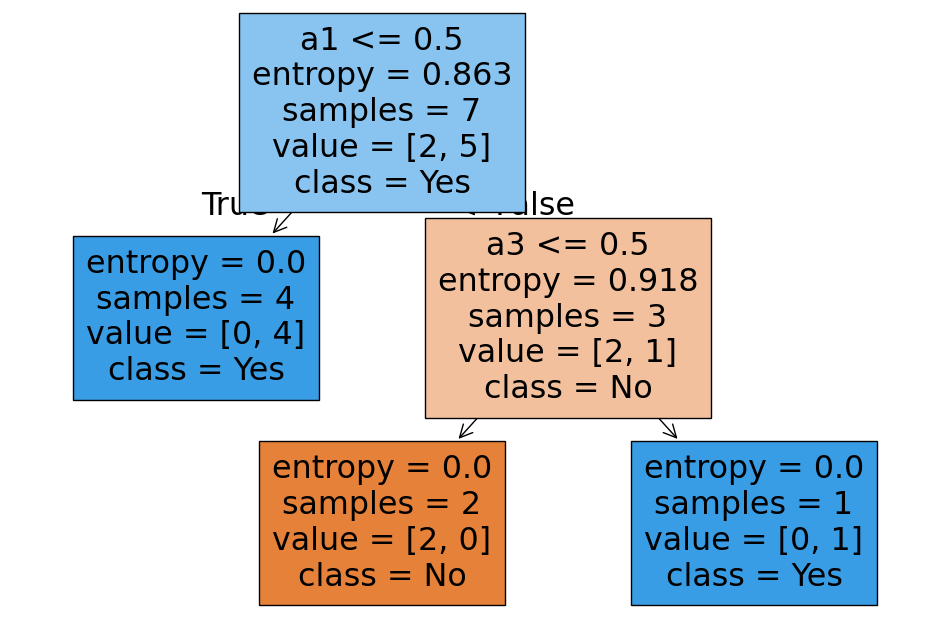

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy: 1.00
Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



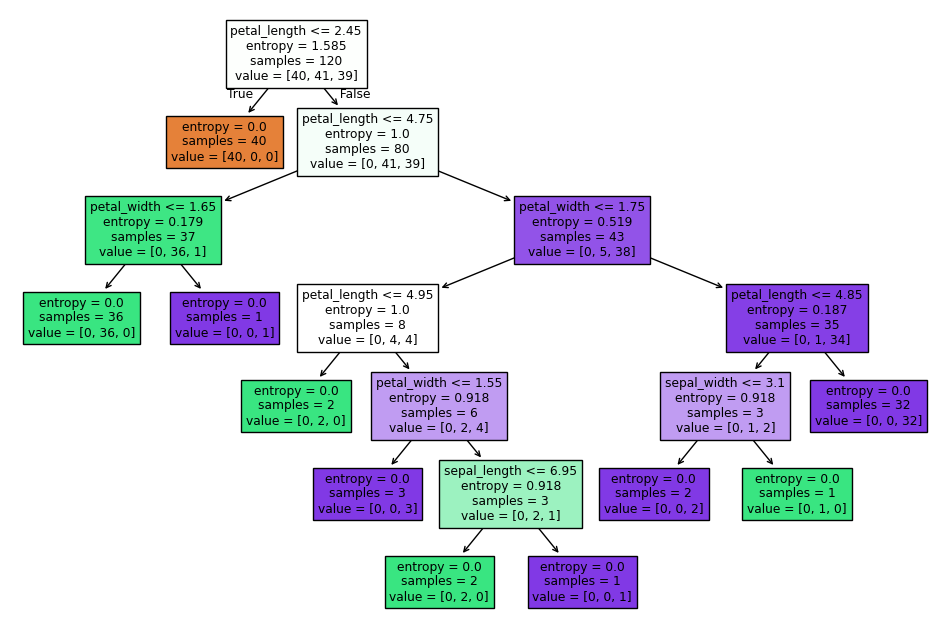

In [15]:
from sklearn.metrics import confusion_matrix

df1 = pd.read_csv('/content/iris.csv')
print(df1.head())
#------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('species', axis=1), df1['species'], test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: ")
print(conf)
print(classification_report(Y_test,Y_pred))
#---------------------------------------------
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY 


Accuracy: 1.00


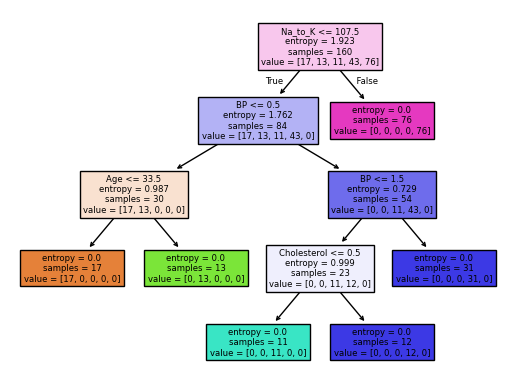

Confusion Matrix: 
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [40]:
df2 = pd.read_csv('/content/drug.csv')
print(df2.head(),"\n\n")

#---------------------------------------------------

for column in df2.columns:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])

X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('Drug', axis=1), df2['Drug'], test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf = confusion_matrix(Y_test, Y_pred)
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.figsize=(12,8)
plt.show()
print("Confusion Matrix: ")
print(conf)

print(classification_report(Y_test,Y_pred))

In [42]:
df3 = pd.read_csv('/content/petrol_consumption.csv')
print(df3.head(),"\n\n")
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#---------------------------------------------------

# for column in df2.columns:
#     le = LabelEncoder()
#     df2[column] = le.fit_transform(df2[column])

X_train, X_test, Y_train, Y_test = train_test_split(df3.drop('Petrol_Consumption', axis=1), df3['Petrol_Consumption'], test_size=0.2, random_state=42)
dtr= DecisionTreeRegressor(criterion='squared_error')

dtr.fit(X_train,Y_train)

Y_pred = dtr.predict(X_test)
accuracy = mean_squared_error(Y_test, Y_pred)
print(f'MSE: {accuracy:.2f}')

print(classification_report(Y_test,Y_pred))

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410   


MSE: 17125.70
              precision    recall  f1-score   support

       410.0       0.00      0.00      0.00       1.0
       414.0       0.00      0.00      0.00       0.0
       460.0       0.00      0.00      0.00       1.0
       510.0       0.00      0.00      0.00       0.0
       524.0       0.00      0.00      0.00       0.0
       525.0       0.00      0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_